#  Fault detection (pass/fail) using SECOM Manufacturing Test Dataset

The dataset presented in this case represents a selection of such features, where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in-house line testing, and associated date and time stamp. Where -1 corresponds to a pass and 1 corresponds to a fail, and the data time stamp is for that specific test point.
This project aims to predict equipment for Maintenance using
 SECOM Manufacturing Data (UCI Machine Learning Repository)
This dataset originates from a semiconductor manufacturing process and comprises over 500 features, representing process measurements and product quality indicators. 
https://archive.ics.uci.edu/dataset/179/secom

### Project structure 
##### 1. Import initial Library
##### 2. Loading Datasets
##### 3. Explore the Data
##### 4. Split the Dataset into Train/Test
##### 5. Feature Engineering
##### 6. Models training
##### 7. Hyperparameter tuning
##### 8. Model selection 
##### 9. Model interpretation
##### 10. Results

## 1. Import initial Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Loading Datasets

In [2]:
# show the first 10 rows
df = pd.read_csv('uci-secom.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## 3. Explore the Data

In [4]:
# print the number of columns and rows in the dataset
print(df.shape)

(1567, 592)


In [5]:
# Prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
# Generates descriptive statistics that summarize the central tendency
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
# Check whether there are any duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1562    False
1563    False
1564    False
1565    False
1566    False
Length: 1567, dtype: bool

In [8]:
# check for missing values
print("Missing Values: \n", df.isnull().sum())

Missing Values: 
 Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


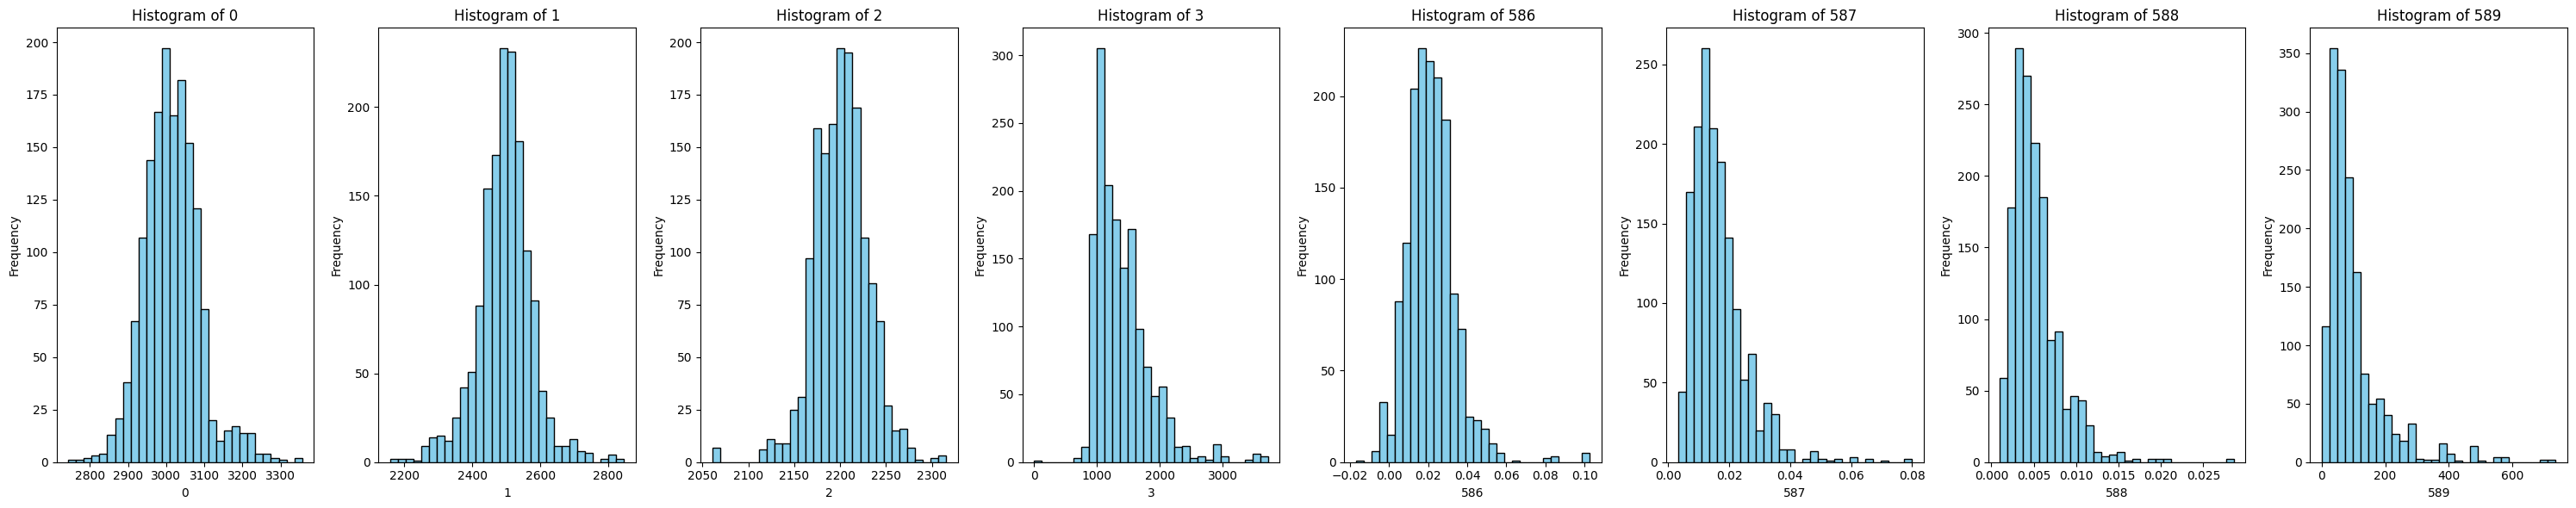

In [9]:
# Selecting specific numeric columns for missing values 
columns = ['0', '1', '2', '3', '586', '587', '588', '589']

# Create subplots (1 row, N columns)
fig, axes = plt.subplots(1, len(columns), figsize=(30, 6))

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
#  the mean to fill is use when the data is normally distributed (no big outliers).
df[['0', '1', '2', '586']] = df[['0', '1', '2', '586']].fillna(df[['0', '1', '2', '586']].mean())

# The median is better for skewed data or when outliers exist.
df[['3', '587', '588', '589']] = df[['3', '587', '588', '589']].fillna(df[['3', '587', '588', '589']].median())


In [11]:
# Delete the Time column which will not be useful in this classification task
df= df.drop(columns=["Time"]) 

In [12]:
# Fill missing values the median
df = df.fillna(df.median(numeric_only=True)) 

In [13]:
# for preference, replace the target column pass will be 0 and fail 1 
df[['Pass/Fail']] = df[['Pass/Fail']].replace(-1, 0)

In [14]:
# show the first 10 rows
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.021458,0.0148,0.0046,71.9005,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.009600,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.058400,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.020200,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.020200,0.0149,0.0044,73.8432,0
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.034200,0.0151,0.0052,44.0077,0
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,72.2889,0.5010,0.0143,0.0042,2.8515,0.034200,0.0151,0.0052,44.0077,0
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.020400,0.0194,0.0063,95.0310,0
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.011100,0.0124,0.0045,111.6525,0
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.021200,0.0191,0.0073,90.2294,0


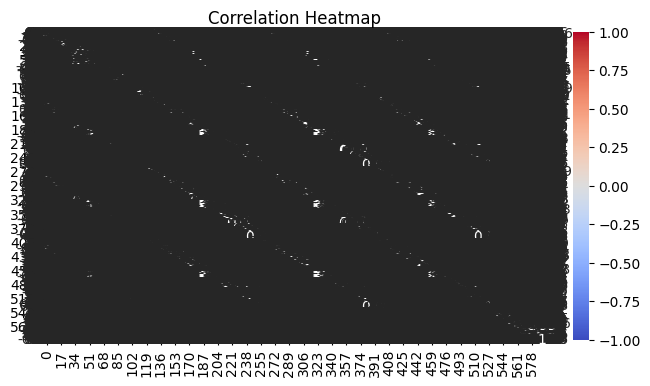

In [15]:
# Create a correlation heatmap for the numerical features
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

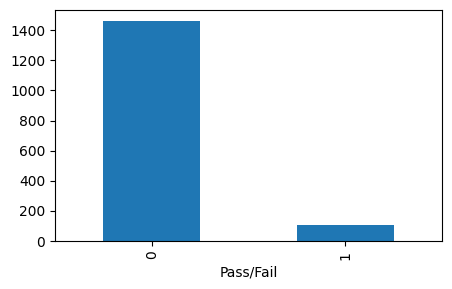

In [16]:
# plot target volue count
df['Pass/Fail']. value_counts().plot(kind='bar', figsize=(5, 3))
plt.show()

In [17]:
# Display Pass/Fail distribution
print(df['Pass/Fail'].value_counts())

Pass/Fail
0    1463
1     104
Name: count, dtype: int64


## 4. Split the Dataset into Train/Test

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [19]:
# split the data into train and test set
X = df.drop(columns=['Pass/Fail'])
y = df['Pass/Fail']

In [20]:
# split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
#Display new class distribution
print(pd.Series(y_train).value_counts())

Pass/Fail
0    1173
1    1173
Name: count, dtype: int64


In [23]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (2346, 590). Training labels size: (2346,)
Test set size: (314, 590). Test labels size: (314,)


## 5. Feature Engineering

In [24]:
# Scale for split data to avoid the model from being biased 
scaler = StandardScaler()#RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [25]:
# Fit the transform 
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

In [26]:
# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed)
X_test_processed_df = pd.DataFrame(X_test_processed)

In [27]:
# Display the first few rows of the processed DataFrame
X_train_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,-0.793880,1.079583,0.223367,-0.495297,-0.034670,0.0,1.555724,-0.086009,1.196731,-1.185841,...,-0.041486,2.065817,2.315107,0.342427,0.541563,0.308882,-1.093813,0.040513,-0.145936,0.963626
1,-0.143911,0.470087,-0.443184,2.600254,-0.023339,0.0,-3.464704,0.376424,-0.879130,0.795154,...,-0.193790,-0.200816,0.604561,-0.411664,-0.389437,-0.397606,-0.623420,-0.889184,-0.983743,-0.423659
2,1.014205,0.521595,0.438063,-0.732269,-0.054300,0.0,0.644125,-0.099609,0.638804,-0.371944,...,-0.193790,-0.200816,1.174743,0.252489,0.156322,0.235366,-0.641512,0.517281,0.768034,0.538111
3,-0.072727,-1.496259,0.800833,0.306250,-0.044513,0.0,1.811463,-0.099609,-0.360165,-1.293336,...,2.293847,1.306788,1.459834,-0.245626,-0.132609,-0.242118,-0.080659,1.566170,1.605841,0.527733
4,0.306467,-0.253630,-0.528662,-1.170374,-0.041731,0.0,0.478829,0.009198,-0.056267,0.134822,...,2.750759,-0.246594,1.016359,-0.494683,-0.485747,-0.482475,2.425086,2.019099,1.948580,-0.364339


In [28]:
# Display the first few rows of the processed DataFrame
X_test_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,-1.092444,0.910711,0.536379,-0.389241,-0.051766,0.0,0.831191,0.199612,0.807117,-0.341231,...,-0.092254,-0.837327,-1.612814,-0.252544,-0.261023,-0.236957,1.249105,-0.281305,-0.184018,-0.703584
1,-0.410032,0.663005,0.584534,0.950458,-0.049064,0.0,-0.145773,-0.004403,0.177502,-1.308693,...,-0.193790,-0.200816,1.174743,-0.287136,-0.421540,-0.280640,0.425917,-0.626962,-0.793332,-0.667628
2,1.737685,-0.762432,1.773979,-1.044580,-0.051345,0.0,1.065815,-0.630047,-0.603284,-1.638859,...,-1.056847,-1.169766,0.604561,0.114124,0.027908,0.106781,1.077230,-1.020295,-0.907579,-0.894496
3,0.596407,0.046131,0.593361,0.344405,-0.051330,0.0,0.970282,-0.167614,0.093345,-0.418013,...,-0.193790,-0.200816,0.224439,-0.335563,-0.357333,-0.327020,-1.401377,-0.340901,-0.298265,1.561905
4,0.844457,0.313921,1.690105,0.080823,-0.037535,0.0,0.342590,-0.086009,2.284532,1.186745,...,-0.193790,-0.200816,-0.915925,-0.183362,-0.132609,-0.174828,0.344503,-0.114437,-0.107854,-0.448356


## 6. Models training

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Define the mpodels to be used for the training 
models ={
    'Randon Forest': RandomForestClassifier(random_state=42),
    'Gradiant Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGB': XGBClassifier(eval_metric='logloss', random_state=42),
    'Lightgbm': LGBMClassifier(),
}

In [31]:
# Variable to store the result and the trained models
results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {model}.....")

    # train the models
    model.fit(X_train_processed_df, y_train)
    y_pred = model.predict(X_test_processed_df)

    #store the model
    trained_models[name] = model
    
    # Compute the test metrics
    Accuracy_test = accuracy_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name, 
        "Accuracy test": Accuracy_test
    })
# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)


Training RandomForestClassifier(random_state=42).....
Training GradientBoostingClassifier().....
Training LogisticRegression().....
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...).....
Training LGBMClassifier().....
[LightGBM] [Info] Number of positive: 1173,

In [32]:
# Display result of the trainig
results_df

,Model,Accuracy test
0,Randon Forest,0.923567
1,Gradiant Boosting,0.907643
2,Logistic Regression,0.853503
3,XGB,0.910828
4,Lightgbm,0.920382


## 7. Hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Define parameters
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 2, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    
    'Lightgbm': {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 7],
    
        
    }
}
# Models dictionary
models = { 
    'Random Forest': RandomForestClassifier(random_state=42),
    'Lightgbm': LGBMClassifier(force_col_wise= True)
}

# Variables to store 
best_models = {}
best_params = {}
results_hyperparameter = []
# function that ulterate through to execute the model
for name, model in models.items():
    print(f"Tuning {name}...")
    search = GridSearchCV(model, param_grid=param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)    
    search.fit(X_train_processed_df, y_train)
    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_

    # Compute the test metrics
    Accuracy_test = accuracy_score(y_test, y_pred)

    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Accuracy_test": Accuracy_test
    })
    
print(f"Best parameters for {name}: {search.best_params_}")
print("-----------------------------------")
# Store results in a pandas DataFrame
results = pd.DataFrame(results_hyperparameter)

Tuning Random Forest...
Tuning Lightgbm...
[LightGBM] [Info] Number of positive: 1173, number of negative: 1173
[LightGBM] [Info] Total Bins 116984
[LightGBM] [Info] Number of data points in the train set: 2346, number of used features: 468
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [35]:
# The results show two models with same accuracy
results

,Model,Best Params,Accuracy_test
0,Random Forest,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.920382
1,Lightgbm,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.920382


## 8. Model selection 

In [36]:
# model selected is LGBMClassifier with hyperparameter
select_model = LGBMClassifier(learning_rate=0.1, max_depth=3,  n_estimators=100)

select_model.fit(X_train_processed_df, y_train)
y_pred = select_model.predict(X_test_processed_df)


[LightGBM] [Info] Number of positive: 1173, number of negative: 1173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116984
[LightGBM] [Info] Number of data points in the train set: 2346, number of used features: 468
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

## 9. Model interpretation

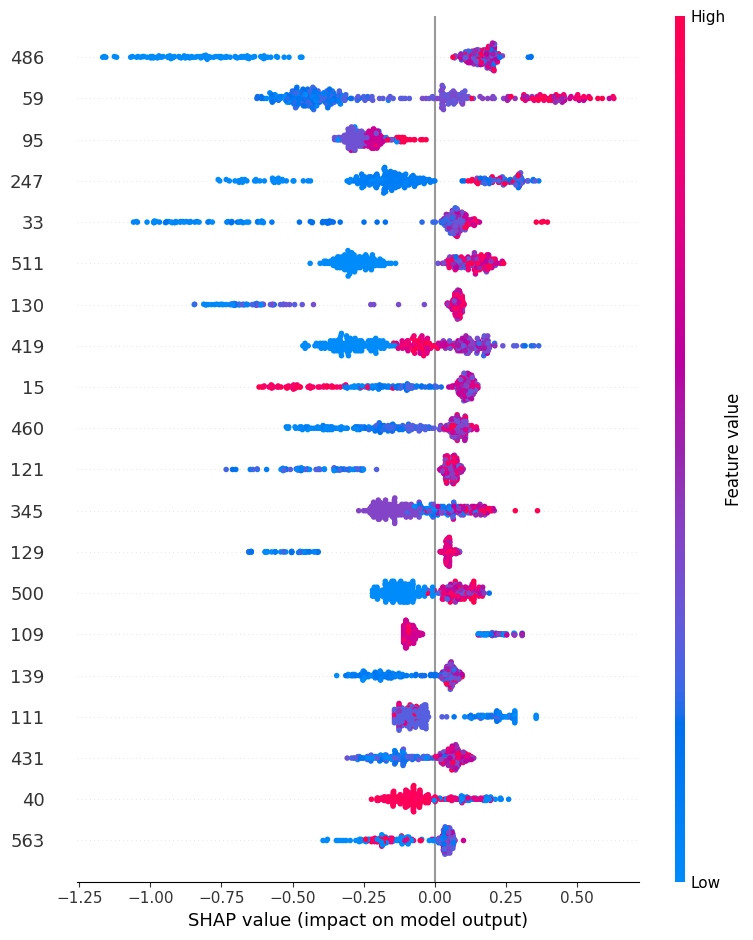

In [37]:
import shap

explainer = shap.Explainer(select_model)
shap_values = explainer(X_test_processed_df)

shap.summary_plot(shap_values, X_test_processed_df)

This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions.

## 10. Results
The final LightGBM model accurately predicts whether a product from the semiconductor manufacturing line will pass or fail quality checks. This means that manufacturers can now detect faulty products early, potentially even before final testing. By identifying patterns linked to failure, the model helps engineers understand which process factors contribute most to defects. This enables faster decision-making, reduces waste, and lowers production costs. In business terms, the model supports quality assurance, process optimization, and improved operational efficiency, ultimately leading to better product reliability and customer satisfaction.  